# Test if iTBS decreases FDG uptake in the sgACC 

In [2]:
from nilearn.plotting import plot_stat_map, plot_roi
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns 
from nibabel.affines import apply_affine
from numpy.linalg import inv

## Create a spherical ROI in sgACC

In [3]:
fsl_dir=os.environ['FSL_DIR']
mni152_brain=fsl_dir + '/data/standard/MNI152_T1_2mm_brain.nii.gz'

data = nb.load(mni152_brain).get_fdata()
affine = nb.load(mni152_brain).affine

# the center and radius of the sphere in MNI coordinates based on https://doi.org/10.1016/j.biopsych.2012.04.028
center_roi = np.array([6, 16, -10])  
radius = 5 

# Convert MNI coordinates to voxel coordinates
center_vox = np.round(apply_affine(inv(affine), center_roi)).astype(int)

# calculate voxels within the sphere 
x, y, z = np.indices(data.shape)
dist_from_center = np.sqrt((x - center_vox[0])**2 + (y - center_vox[1])**2 + (z - center_vox[2])**2)

# Create a binary spherical mask
mask = dist_from_center <= radius
mask_img = nb.Nifti1Image(mask.astype('float32'), affine)

In [4]:
# alternative ROIs based on https://doi.org/10.1016/j.brs.2019.10.012
center_roi = np.array([2, 18, -8])  
radius = 6 

# Convert MNI coordinates to voxel coordinates
center_vox = np.round(apply_affine(inv(affine), center_roi)).astype(int)

# calculate voxels within the sphere 
x, y, z = np.indices(data.shape)
dist_from_center = np.sqrt((x - center_vox[0])**2 + (y - center_vox[1])**2 + (z - center_vox[2])**2)

# Create a binary spherical mask
mask = dist_from_center <= radius
alternative_roi1 = nb.Nifti1Image(mask.astype('float32'), affine)

center_roi = np.array([3, 39, -2])  #X-3 Y+39 Z-2
radius = 6 

# Convert MNI coordinates to voxel coordinates
center_vox = np.round(apply_affine(inv(affine), center_roi)).astype(int)

# calculate voxels within the sphere 
x, y, z = np.indices(data.shape)
dist_from_center = np.sqrt((x - center_vox[0])**2 + (y - center_vox[1])**2 + (z - center_vox[2])**2)

# Create a binary spherical mask
mask = dist_from_center <= radius
alternative_roi2 = nb.Nifti1Image(mask.astype('float32'), affine)


## Plot ROI

/Users/laurituominen/anaconda3/lib/python3.10/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


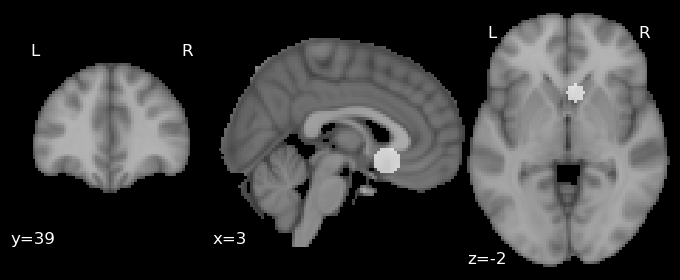

In [5]:
from matplotlib.colors import LinearSegmentedColormap

# Define a fully white colormap
white_cmap = LinearSegmentedColormap.from_list('white_cmap', ['white', 'white'])

display = plot_roi(
    mask_img,
    bg_img= mni152_brain,
    colorbar=False,
    cmap= white_cmap,
    draw_cross=False,
    cut_coords=(center_roi),
);
display.savefig('/Users/laurituominen/Documents/Research/FDGPET/petanalysis/tbsfdg/figures/original_roi.png')

# Plot alternative ROI

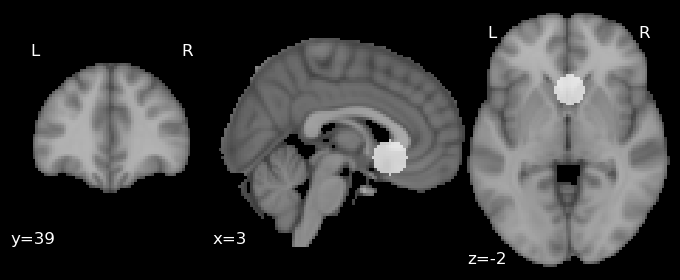

In [7]:
display = plot_roi(
    alternative_roi1,
    bg_img= mni152_brain,
    colorbar=False,
    cmap= white_cmap,
    draw_cross=False,
    cut_coords=(center_roi),
);
display.savefig('/Users/laurituominen/Documents/Research/FDGPET/petanalysis/tbsfdg/figures/alternative_sg.png')

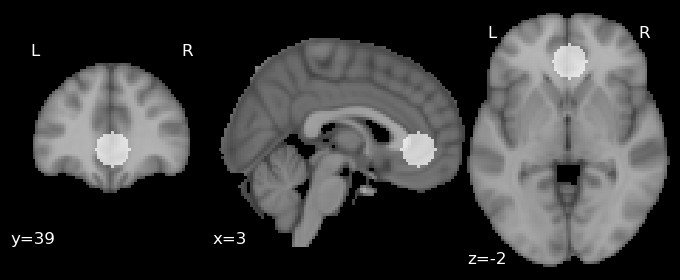

In [8]:
display = plot_roi(
    alternative_roi2,
    bg_img= mni152_brain,
    colorbar=False,
    cmap= white_cmap,
    draw_cross=False,
    cut_coords=(center_roi),
);
display.savefig('/Users/laurituominen/Documents/Research/FDGPET/petanalysis/tbsfdg/figures/alternative_rostral.png')

# Get osgm sig map

In [10]:
mni152_mask=nb.load(fsl_dir + '/data/standard/MNI152_T1_2mm_brain_mask.nii.gz').get_fdata()

data = nb.load('../group/active_vs_sham/osgm/sig.nii.gz').get_fdata()
affine = nb.load('../group/active_vs_sham/osgm/sig.nii.gz').affine
masked = data * mni152_mask
img = nb.Nifti1Image(masked, affine)



# Plot roi & osgm (center ROI)

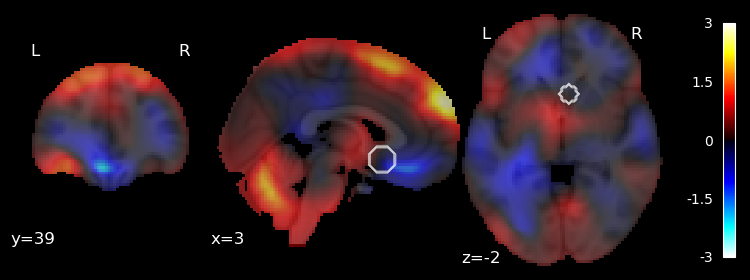

In [11]:
display = plot_stat_map(
    img,
    bg_img=mni152_brain,
    threshold=0,
    draw_cross=False,
    alpha = 0.6,
    cut_coords=(center_roi)
);

display.add_contours(mask_img, colors='white', linewidths=0.25)

# Plot roi & osgm (center blob)

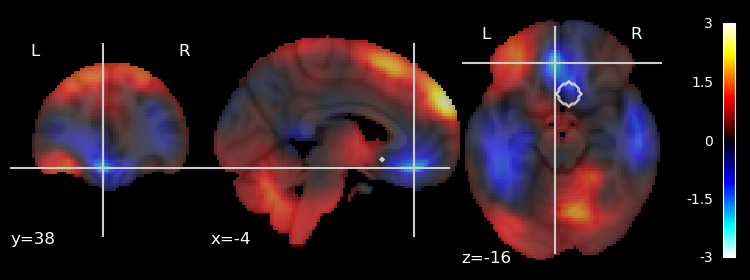

In [12]:
front = masked[:,:,:45]
xyz = np.concatenate(np.where(masked == np.min(front)))
coord = apply_affine(affine,xyz)

display = plot_stat_map(
    img,
    bg_img=mni152_brain,
    threshold=0,
    draw_cross=True,
    alpha = 0.6,
    cut_coords=(coord)
);

display.add_contours(mask_img, colors='white', linewidths=0.25)

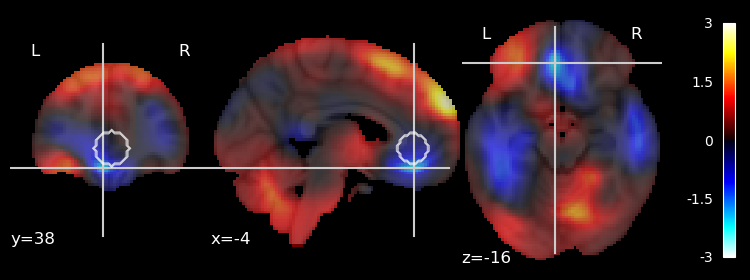

In [15]:
display = plot_stat_map(
    img,
    bg_img=mni152_brain,
    threshold=0,
    draw_cross=True,
    alpha = 0.6,
    cut_coords=(coord)
);

display.add_contours(alternative_roi2, colors='white', linewidths=0.25)
display.savefig('/Users/laurituominen/Documents/Research/FDGPET/petanalysis/tbsfdg/figures/PET_activation_alternative_rostral.png')

